<a href="https://colab.research.google.com/github/MrDarkTesla/QCL_2021/blob/main/File_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install qiskit

     |████████████████████████████████| 8.5MB 7.4MB/s 
     |████████████████████████████████| 17.6MB 259kB/s 
     |████████████████████████████████| 204kB 42.5MB/s 
     |████████████████████████████████| 204kB 61.0MB/s 
     |████████████████████████████████| 2.1MB 32.1MB/s 
     |████████████████████████████████| 1.3MB 43.2MB/s 
     |████████████████████████████████| 5.9MB 39.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 194kB 55.0MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 614kB 32.7MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 2.6MB 33.8MB/s 
     |████████████████████████████████| 5.5MB 46.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.2-cp36-none-any.whl size=2876 sha256=20edd7a911eee2145a17d7ba51930bea3e5048132831aebee98bdbcfd0b9e890
  Stored in directory: /root/.cache/pip/wheels/c2/62/3e/d5aeec3b19ba0e

In [ ]:
# Initialization
import matplotlib.pyplot as plt

# Importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [ ]:
in_reg = QuantumRegister(2, "in")
out_reg = QuantumRegister(2, "out")
cr = ClassicalRegister(4)

In [ ]:
qc = QuantumCircuit(in_reg, out_reg, cr)

qc.h(in_reg[0])
qc.h(in_reg[1])


qc.ccx(in_reg[0], in_reg[1], out_reg[1])
qc.cx(in_reg[0], out_reg[0])
qc.cx(in_reg[1], out_reg[0])

qc.barrier()

qc.measure(in_reg, cr[:2])
qc.measure(out_reg, cr[2:])
qc.draw()

┌───┐                ░ ┌─┐         
 in_0: ┤ H ├──■────■────────░─┤M├─────────
       ├───┤  │    │        ░ └╥┘┌─┐      
 in_1: ┤ H ├──■────┼────■───░──╫─┤M├──────
       └───┘  │  ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐   
out_0: ───────┼──┤ X ├┤ X ├─░──╫──╫─┤M├───
            ┌─┴─┐└───┘└───┘ ░  ║  ║ └╥┘┌─┐
out_1: ─────┤ X ├───────────░──╫──╫──╫─┤M├
            └───┘           ░  ║  ║  ║ └╥┘
 c4: 4/════════════════════════╩══╩══╩══╩═
                               0  1  2  3

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)

{'0000': 277, '0101': 256, '0110': 219, '1011': 248}


In [ ]:
def diffuser(qc, address):
  qc.h(address)
  qc.x(address)

  qc.h(address[-1])
  qc.mct(address[:-1], address[-1])
  qc.h(address[-1])
  qc.x(address)
  qc.h(address)
  

In [ ]:
def oracle_funk(qc, address, oracle):
  
  ans = "101"

  qc.x(oracle)
  qc.h(oracle)
  for i, l in enumerate(ans):
    if l == "0":
      qc.x(address[i])
  qc.mct(address, oracle[0])
  for i, l in enumerate(ans):
    if l == "0":
      qc.x(address[i])
  qc.h(oracle)
  qc.x(oracle)
  


In [ ]:
address = QuantumRegister(6, "address")
oracle = QuantumRegister(1, "oracle")
cr = ClassicalRegister(6)

In [ ]:
res = []
for n_iter in range(8):
  qc = QuantumCircuit(address, oracle, cr)
  qc.h(address)
  for i in range(n_iter):
    oracle_funk(qc, address, oracle)
    qc.barrier()
    diffuser(qc, address)
  qc.measure(address, cr)

  backend = Aer.get_backend('qasm_simulator')
  job = execute(qc, backend, shots=1000)
  result = job.result()
  count = result.get_counts()
  plot_histogram(count)
  res.append(count["000001"] / 1000)

KeyError: ignored

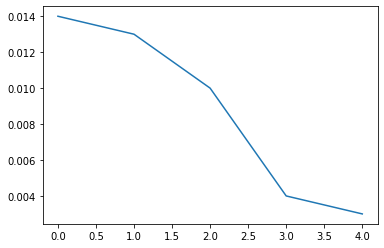

In [ ]:
plt.plot(res)

QRAM

In [ ]:
def my_bin(el, n):
    return "0" * (n - len(bin(el)[2:])) + bin(el)[2:] 

In [ ]:
def QRAM(qc, address, database, array):
  for j, el in enumerate(array):
    for i, l in enumerate(my_bin(j, 2)):
      if l == "0":
        qc.x(address[i])
    for i, l in enumerate(my_bin(el, 3)):
      if l == "1":
        qc.mct(address, database[i])

    for i, l in enumerate(my_bin(j, 2)):
      if l == "0":
        qc.x(address[i])
    qc.barrier()

In [ ]:
address = QuantumRegister(2, "address")
database = QuantumRegister(3, "database")
oracle = QuantumRegister(1, "oracle")
cr = ClassicalRegister(2)

In [ ]:
qc = QuantumCircuit(address, database, oracle, cr)
qc.h(address)
for i in range(1):
  QRAM(qc, address, database, [0, 5, 7, 1])
  oracle_funk(qc, database, oracle)
  QRAM(qc, address, database, [0, 5, 7, 1])
  diffuser(qc, address)
qc.measure(address, cr)


In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count = result.get_counts()
count

{'10': 1000}

In [1]:
1

1